# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Kuo Yung Sheng
- MSSV: 21127684
- Lớp: 21CLC07

# Import

In [4]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [5]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Cài đặt hàm

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [7]:
features=['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 
 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain']
X_trainA=X_train[features]
X_testA=X_test[features]
y_trainA=y_train
reg = LinearRegression().fit(X_trainA, y_trainA)
y_predict=reg.predict(X_testA)

In [8]:
mae = round(mean_absolute_error(y_true=y_test,y_pred=y_predict),3)
print(mae)

105052.53


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [13]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
features=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
X_trainB=X_train[features]

# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5,shuffle=True)
# for i in features:
#   kf.get_n_splits(X_train[i])
#   for j, (train_index, test_index) in enumerate(kf.split(X_train[i])):
#     print(f"Fold {j}:")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")
for i in features:
   print(i)
   results = cross_validate(LinearRegression(), X_train[[i]], y_train, cv=5,scoring='neg_mean_absolute_error')
   print(-results['test_score'].mean())

conscientiousness
124444.48696126812
agreeableness
123813.28712231014
extraversion
123914.50490042963
nueroticism
123738.52541404287
openess_to_experience
124119.48107191359


In [14]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
reg = LinearRegression().fit(X_train[['nueroticism']], y_train)
y_predict=reg.predict(X_test[['nueroticism']])

In [15]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
mae = round(mean_absolute_error(y_true=y_test,y_pred=y_predict),3)
print(mae)

119361.917


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [10]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
features =['English','Logical','Quant']
for i in features:
   print(i)
   results = cross_validate(LinearRegression(), X_train[[i]], y_train, cv=5,scoring='neg_mean_absolute_error')
   print(-results['test_score'].mean())

English
120963.06945762748
Logical
120037.71893286356
Quant
117461.46396286949


In [17]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
reg = LinearRegression().fit(X_train[['Quant']], y_train)
y_predict=reg.predict(X_test[['Quant']])

In [18]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
mae = round(mean_absolute_error(y_true=y_test,y_pred=y_predict),3)
print(mae)

108814.06


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

<AxesSubplot:>

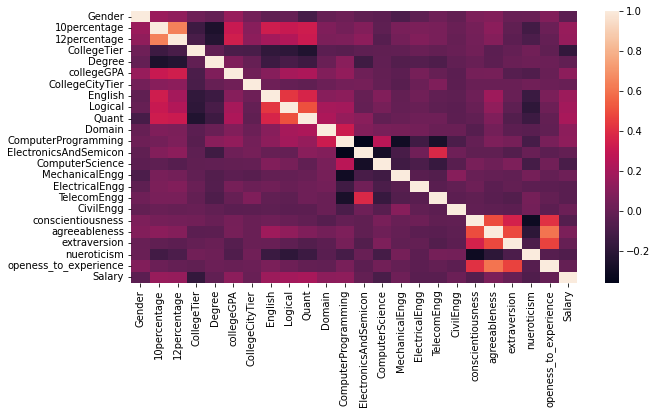

In [7]:
# Trình bày các phần tìm ra mô hình
plt.figure(figsize=(10,5))
sns.heatmap(train.corr())

## Thử nghiệm, so sánh các mô hình

In [10]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu
features =[['conscientiousness','agreeableness'],
           ['Quant','Logical',],
           ['10percentage','English'],
           ['collegeGPA','12percentage'],
           ['Quant','Logical','10percentage','collegeGPA',],
           ['Quant','10percentage'],
           ['Quant','10percentage','English'],
           ['ElectronicsAndSemicon','ComputerProgramming'],
           ['CollegeTier','Quant']
           ]
# print(X_train[features[0]])
for i in features:
   print(i)
   results = cross_validate(LinearRegression(), X_train[i], y_train, cv=20,scoring='neg_mean_absolute_error')
   print(-results['test_score'].mean())

['conscientiousness', 'agreeableness']
123706.57628368158
['Quant', 'Logical']
116718.94381198932
['10percentage', 'English']
117921.55684703798
['collegeGPA', '12percentage']
119178.21668003441
['Quant', 'Logical', '10percentage', 'collegeGPA']
114560.24465161569
['Quant', '10percentage']
115138.80817310812
['Quant', '10percentage', 'English']
114760.92647901442
['ElectronicsAndSemicon', 'ComputerProgramming']
122410.64303667788
['CollegeTier', 'Quant']
117475.62879273777


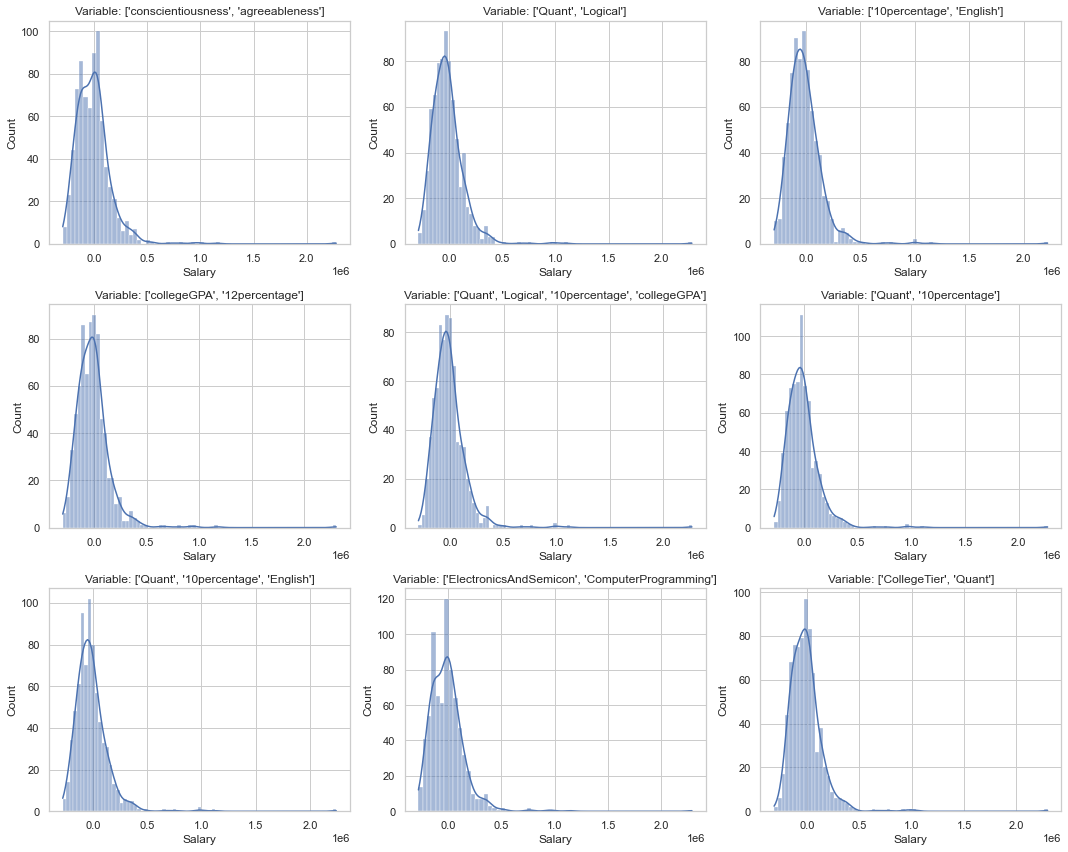

In [11]:
# Vẽ nhiều biểu đồ histogram
plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

for i in range(len(features)):
    reg = LinearRegression().fit(X_train[features[i]], y_train)
    y_predict=reg.predict(X_test[features[i]])
    difference = y_test - y_predict
    plt.subplot(3, 3, i+1) 
    sns.histplot(difference,kde=True )  # kde: kernel density estimate
    plt.title(f"Variable: {features[i]}")

plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

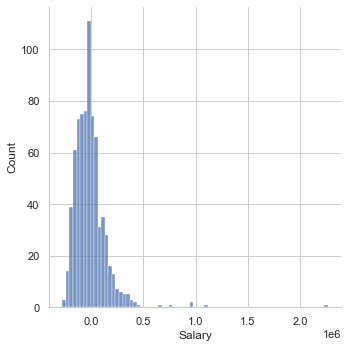

In [116]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
reg = LinearRegression().fit(X_train[['Quant','10percentage']], y_train)
y_predict=reg.predict(X_test[['Quant','10percentage']])
difference = y_test - y_predict
plt.figure(figsize=(20,20))
sns.displot(difference,)

In [117]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
mae = round(mean_absolute_error(y_true=y_test,y_pred=y_predict),3)
print(mae)

106022.179


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$